<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [4]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

import pandas as pd
from bs4 import BeautifulSoup

NOME_ARQUIVO_XML = 'estados-bruto.xml'

with open(NOME_ARQUIVO_XML, 'r', encoding='utf-8') as file:
    conteudo = file.read()

fonte = BeautifulSoup(conteudo, 'lxml')
print(fonte)

<?xml version="1.0" encoding="utf-8" ?><html><body><estados>
<estado>
<id>1</id>
<nome>ACRE</nome>
<idcapital>16</idcapital>
<sigla>AC</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>2</id>
<nome>ALAGOAS</nome>
<idcapital>68</idcapital>
<sigla>AL</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>3</id>
<nome>AMAPA</nome>
<idcapital>131</idcapital>
<sigla>AP</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>4</id>
<nome>AMAZONAS</nome>
<idcapital>178</idcapital>
<sigla>AM</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>5</id>
<nome>BAHIA</nome>
<idcapital>536</idcapital>
<sigla>BA</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>6</id>
<nome>CEARA</nome>
<idcapital>676</idcapital>
<sigla>CE</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>7</id>
<nome>DISTRITO FEDERAL</nome>
<idcapital>916</idcapital>
<sigla>DF</sigla>
<regiao>CENTRO-OESTE</regiao>
</estado>
<estado>
<id>8</id>
<nome>ESPIRITO SANTO</nome>
<idcapital>879</idcapital>
<sigla>ES</sigla

<ipython-input-4-f40397916b79>:11: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  fonte = BeautifulSoup(conteudo, 'lxml')


In [5]:
#criando as variáveis
estados = []
siglas = []
regioes = []

#utilizando a repetição for
for estado in fonte.find_all('estado'):
    estados.append(estado.find('nome').text.strip()) #Encontra a tag <nome> dentro do elemento <estado>, extrai o texto, e remove espaços em branco no início e no final usando strip().
    siglas.append(estado.find('sigla').text.strip())
    regioes.append(estado.find('regiao').text.strip())

#criação do DataFrame
estados_df = pd.DataFrame({
    'estado': estados,
    'sigla': siglas,
    'regiao': regioes
})


print(estados_df.head())

     estado sigla    regiao
0      ACRE    AC     NORTE
1   ALAGOAS    AL  NORDESTE
2     AMAPA    AP     NORTE
3  AMAZONAS    AM     NORTE
4     BAHIA    BA  NORDESTE


In [6]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'estados-limpo.csv'

estados_df.to_csv(NOME_ARQUIVO_DESTINO, sep=';', index=False)

### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [8]:
# ler o arquivo cidades-bruto.csv

import pandas as pd

NOME_ARQUIVO_FONTE = 'cidades-bruto.csv'

fonte_df = pd.read_csv(NOME_ARQUIVO_FONTE, sep=',')
print(fonte_df)

                                                  FID   gid  \
0     vw_pib_percapita.fid-4514e25a_17aaa325034_-258f   215   
1     vw_pib_percapita.fid-4514e25a_17aaa325034_-258e   306   
2     vw_pib_percapita.fid-4514e25a_17aaa325034_-258d   900   
3     vw_pib_percapita.fid-4514e25a_17aaa325034_-258c  3613   
4     vw_pib_percapita.fid-4514e25a_17aaa325034_-258b  1028   
...                                               ...   ...   
5561   vw_pib_percapita.fid-4514e25a_17aaa325034_-eba  5254   
5562   vw_pib_percapita.fid-4514e25a_17aaa325034_-eb9  2749   
5563   vw_pib_percapita.fid-4514e25a_17aaa325034_-eb8  3779   
5564   vw_pib_percapita.fid-4514e25a_17aaa325034_-eb7   617   
5565   vw_pib_percapita.fid-4514e25a_17aaa325034_-eb6   672   

                     UF              nome   Censo           PIB  Pop_est_2009  \
0                 BAHIA          Tremedal  2010.0  5.788399e+04         18433   
1     RIO GRANDE DO SUL            Turuçu  2010.0  4.572388e+04          4000   


In [11]:
#criando as listas para armazenar os dados
estado = []
cidades = []
populacao = []
pib = []
pib_percapita = []

#utilizando o for para extrair os dados
for index, linha in fonte_df.iterrows(): #fonte_df.iterrows(): Método do Pandas que retorna um iterador gerando pares (índice, linha) para cada linha do DataFrame. index é o índice da linha, e linha é uma Série Pandas representando a linha.
    estado.append(str(linha['UF']))
    cidades.append(str(linha['nome']))

    try:
        populacao.append(int(linha['Pop_est_2009']))
    except ValueError:
        populacao.append(None)

    try:
        pib.append(float(linha['PIB']))
    except ValueError:
        pib.append(None)

    try:
        pib_percapita.append(float(linha['PIB_percapita']))
    except ValueError:
        pib_percapita.append(None)

In [12]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;
NOME_ARQUIVO_DESTINO = 'cidades-limpo.csv'

cidades_df = pd.DataFrame({
    'estado': estado,
    'cidade': cidades,
    'populacao': populacao,
    'pib': pib,
    'pib_percapita': pib_percapita
})

# Salvar os dados no arquivo CSV
cidades_df.to_csv(NOME_ARQUIVO_DESTINO, sep=';', index=False)

### **1.3. Brasil**

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-limpo.csv` com os dados do arquivo `cidades-limpo.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [13]:
#colocando os dataframes que foram criados
estados_df = pd.read_csv('estados-limpo.csv', delimiter=';')
cidades_df = pd.read_csv('cidades-limpo.csv', delimiter=';')

# combinando os dataframes
df_combined = pd.concat([estados_df, cidades_df], ignore_index=True)

#instruindo que o data frame combinado criará o arquivo brasil.csv
df_combined.to_csv('brasil.csv', index=False)

#renomeando as colunas dos dataframes para ficar com nome igual e puxar as infos.
estados_df = estados_df.rename(columns = {'nome':'estado'})

cidades_df = cidades_df.rename(columns = {'UF':'estado'})

#criando o dicionário para renomear os estados, tirando os acentos.
estados = {
    'RIO GRANDE DO SUL': 'RIO GRANDE DO SUL',
    'ESPIRITO SANTO': 'ESPIRITO SANTO',
    'MINAS GERAIS': 'MINAS GERAIS',
    'PIAUÍ': 'PIAUI',
    'GOIÁS': 'GOIAS',
    'PERNAMBUCO': 'PERNAMBUCO',
    'PARÁ': 'PARA',
    'SERGIPE': 'SERGIPE',
    'SÃO PAULO': 'SAO PAULO',
    'PARAÍBA': 'PARAIBA',
    'TOCANTINS': 'TOCANTINS',
    'AMAZONAS': 'AMAPA',
    'SANTA CATARINA': 'SANTA CATARINA',
    'CEARÁ': 'CEARA',
    'RORAIMA': 'RORAIMA',
    'MARANHÃO': 'MARANHAO',
    'RIO DE JANEIRO': 'RIO DE JANEIRO',
    'MATO GROSSO': 'MATO GROSSO',
    'PARANÁ': 'PARANA',
    'ALAGOAS': 'ALAGOAS',
    'MATO GROSSO DO SUL': 'MATO GROSSO DO SUL',
    'ACRE': 'ACRE',
    'RIO GRANDE DO NORTE': 'RIO GRANDE DO NORTE',
    'RONDÔNIA': 'RONDONIA',
    'AMAPÁ': 'AMAPA',
    'DISTRITO FEDERAL': 'DISTRITO FEDERAL'
}

cidades_df['estado'] = cidades_df['estado'].replace(estados)

brasil_df = pd.merge(left=cidades_df, right=estados_df, on="estado", how="inner")

brasil_df.to_csv('brasil.csv', sep=';', index=False)

---

## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [16]:
brasil_df = pd.read_csv('brasil.csv', sep=';')
print(brasil_df.head())

  estado                 cidade  populacao           pib  pib_percapita sigla  \
0  BAHIA               Tremedal      18433  57883.992188    3140.239990    BA   
1  BAHIA               Maetinga       7884  23558.447266    2988.129883    BA   
2  BAHIA               Ibirapuã       7893  74997.406250    9501.759766    BA   
3  BAHIA  Governador Mangabeira      20668  92903.820312    4495.060059    BA   
4  BAHIA                Ibititá      19410  62366.886719    3213.129883    BA   

     regiao  
0  NORDESTE  
1  NORDESTE  
2  NORDESTE  
3  NORDESTE  
4  NORDESTE  


### **2.2. Analise**

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [19]:
# código para responder a pergunta

brasil_df.nlargest(10, 'populacao')[['cidade', 'populacao']]

,cidade,populacao
3278,São Paulo,11037593
4528,Rio de Janeiro,6186710
44,Salvador,2998056
5565,Brasília,2606885
4244,Fortaleza,2505552
1736,Belo Horizonte,2452617
4876,Curitiba,1851215
3727,Manaus,1738641
2439,Recife,1561659
2628,Belém,1437600


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [20]:
# código para responder a pergunta

df_nordeste = (brasil_df.loc[brasil_df['regiao'] =='NORDESTE'])
df_nordeste.nsmallest(5, ['pib_percapita'])[['cidade', 'pib_percapita']]

,cidade,pib_percapita
4487,São Vicente Ferrer,1929.969971
4382,Cajapió,2203.830078
69,Lamarão,2327.149902
1849,Dom Inocêncio,2358.239990
4507,Timbiras,2368.159912


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [21]:
# código para responder a pergunta

df_saopaulo = (brasil_df.loc[brasil_df['estado'] == 'SAO PAULO'])
df_saopaulo.nlargest(15, ['pib'])[['cidade', 'pib']]

,cidade,pib
3278,São Paulo,389317152.0
3230,Guarulhos,32473828.0
3347,Campinas,31654720.0
3112,Osasco,31616452.0
2815,São Bernardo do Campo,28935768.0
3351,Barueri,26908070.0
2772,Santos,22546134.0
2999,São José dos Campos,22018042.0
3019,Jundiaí,16585137.0
2821,Santo André,14709603.0


 - Qual é o PIB do estado de Santa Catarina?

In [22]:
# código para responder a pergunta

df_sc = (brasil_df.loc[brasil_df['estado'] == 'SANTA CATARINA'])
soma = df_sc['pib'].sum()
print(f'O PIB de Santa Catarina é igual a {soma}')

O PIB de Santa Catarina é igual a 129806256.75195317


 - Qual é o população da região sul?

In [24]:
# código para responder a pergunta
df_populacaosul = (brasil_df.loc[brasil_df['regiao'] == 'SUL'])
soma_populacaosul = df_populacaosul['populacao'].sum()
print(f'A população da região Sul é de {soma_populacaosul} habitantes')

A população da região Sul é de 27719118 habitantes


 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [25]:
# código para responder a pergunta

ms_df = brasil_df[brasil_df['estado'] == 'MATO GROSSO DO SUL']
pib_percapita_medio = ms_df['pib_percapita'].mean()

print(f"O PIB per capita médio das cidades do Mato Grosso do Sul é: {pib_percapita_medio}")

O PIB per capita médio das cidades do Mato Grosso do Sul é: 14458.896859975644


 - Qual é a população do Brasil?

In [26]:
# código para responder a pergunta

df_popbrasil = brasil_df['populacao'].sum()
print(f'A população do Brasil é: {df_popbrasil}')

A população do Brasil é: 191501418


### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

<ipython-input-27-d63905cd1904>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cidade', y='populacao', data=menores_cidades, palette='pastel')


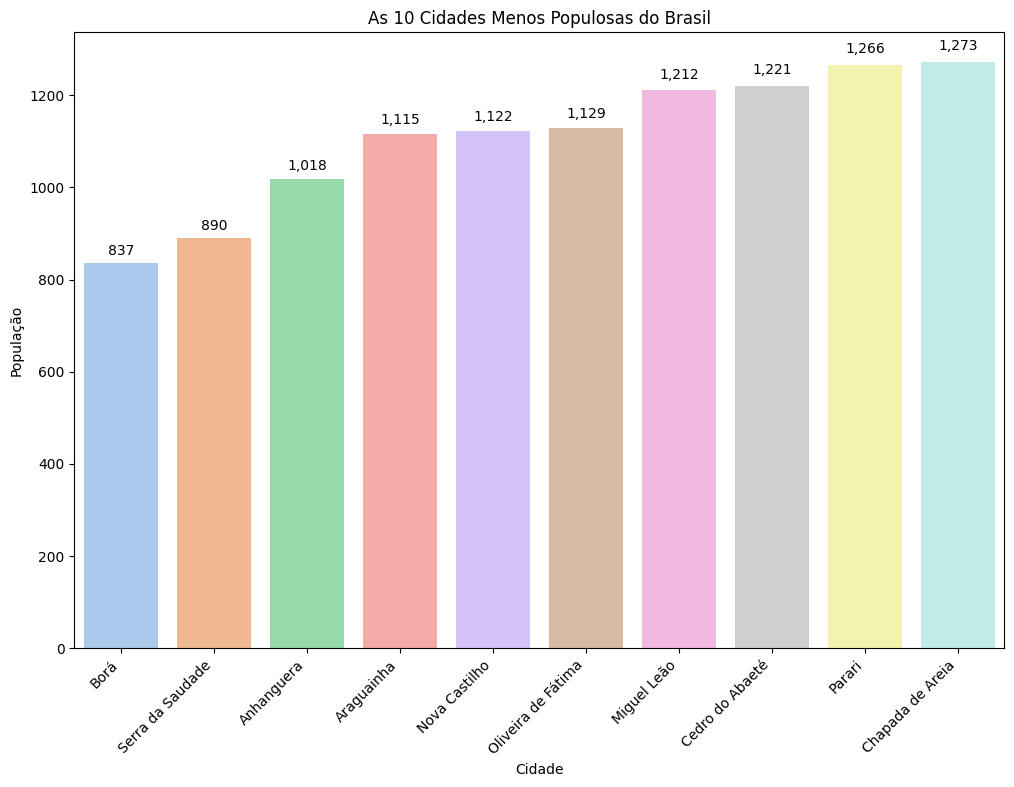

In [27]:
# código para gerar a visualização

import seaborn as sns
import matplotlib.pyplot as plt

menores_cidades = brasil_df.nsmallest(10, 'populacao')[['cidade', 'populacao']]

plt.figure(figsize=(12, 8))
sns.barplot(x='cidade', y='populacao', data=menores_cidades, palette='pastel')
plt.title('As 10 Cidades Menos Populosas do Brasil')
plt.xlabel('Cidade')
plt.ylabel('População')
for index, value in enumerate(menores_cidades['populacao']):
    plt.text(index, value + 0.02 * value, f'{value:,.0f}', ha='center')
plt.xticks(rotation=45, ha='right')
plt.show()

 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

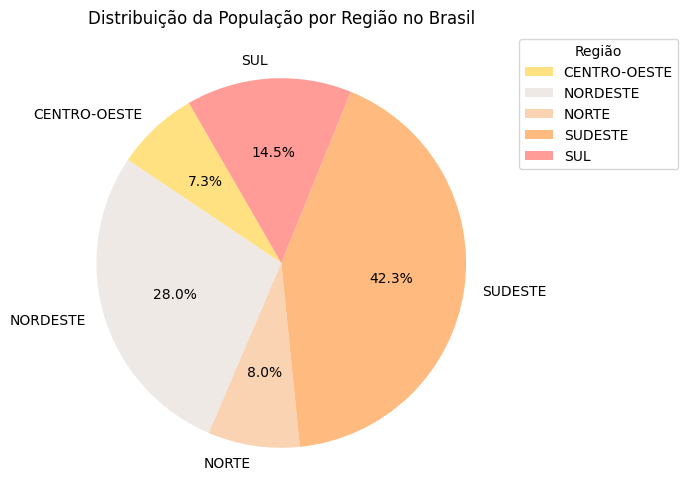

In [28]:
# código para gerar a visualização

df_agrupado = brasil_df[['regiao', 'populacao']].groupby('regiao').agg('sum')
cores = ['#ffe181', '#eee9e5', '#fad3b2', '#ffba7f', '#ff9c97']

plt.figure(figsize=(10, 6))
plt.pie(df_agrupado['populacao'], labels=df_agrupado.index, autopct='%1.1f%%', startangle=120, colors=cores)
plt.title('Distribuição da População por Região no Brasil')
plt.legend(title='Região', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()